In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("CyberWarfareIntrusionDetection.csv")
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
if 'class' in df.columns:
    df.rename(columns={'class': 'label'}, inplace=True)

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.info()
df.describe()
df.shape


<class 'pandas.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  str    
 2   service                      25192 non-null  str    
 3   flag                         25192 non-null  str    
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell                 

(25192, 42)

In [5]:
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

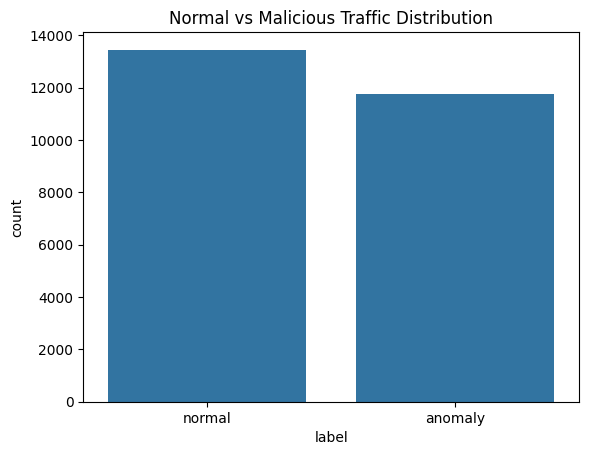

In [6]:
sns.countplot(x='label', data=df)
plt.title("Normal vs Malicious Traffic Distribution")
plt.show()


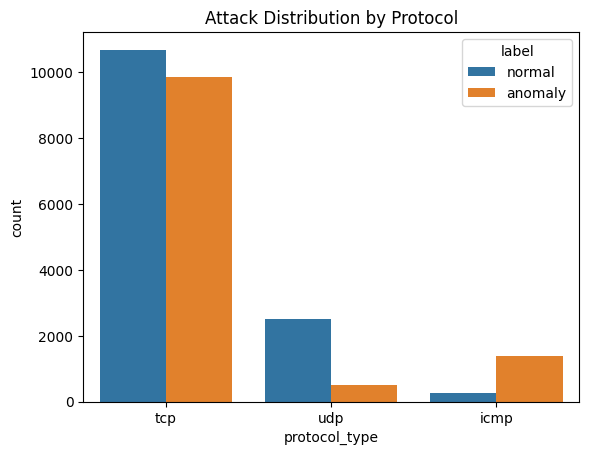

In [7]:
sns.countplot(x='protocol_type', hue='label', data=df)
plt.title("Attack Distribution by Protocol")
plt.show()


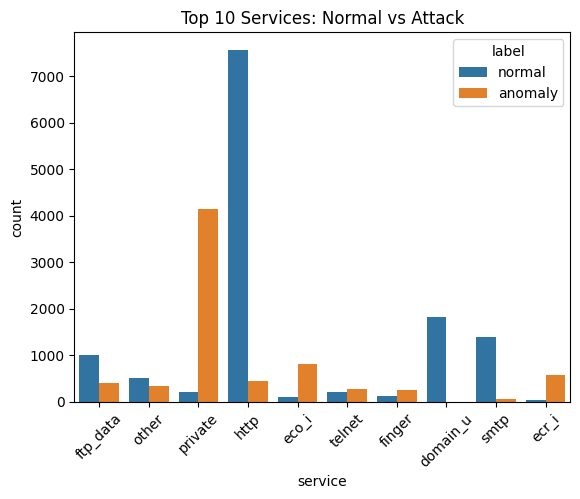

In [8]:
top_services = df['service'].value_counts().nlargest(10).index

sns.countplot(
    data=df[df['service'].isin(top_services)],
    x='service',
    hue='label'
)
plt.xticks(rotation=45)
plt.title("Top 10 Services: Normal vs Attack")
plt.show()


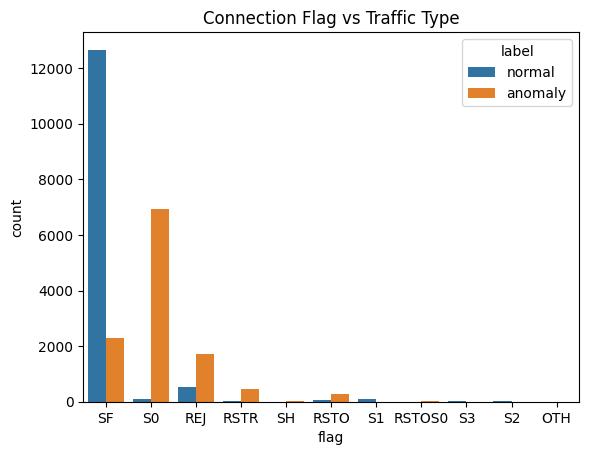

In [9]:
sns.countplot(x='flag', hue='label', data=df)
plt.title("Connection Flag vs Traffic Type")
plt.show()


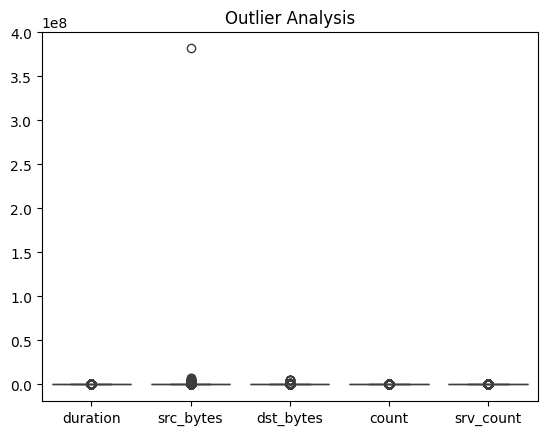

In [10]:
sns.boxplot(data=df[['duration','src_bytes','dst_bytes','count','srv_count']])
plt.title("Outlier Analysis")
plt.show()


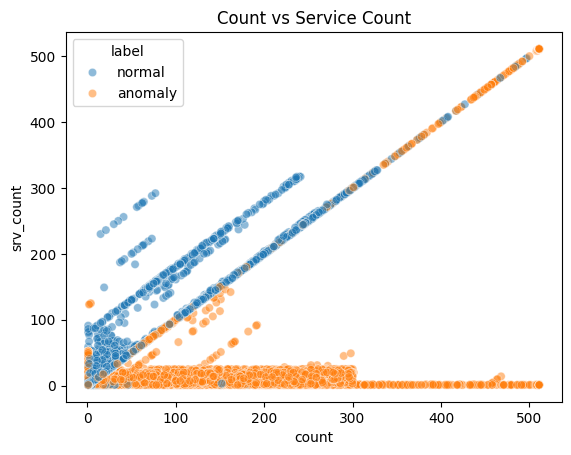

In [11]:
sns.scatterplot(data=df, x='count', y='srv_count', hue='label', alpha=0.5)
plt.title("Count vs Service Count")
plt.show()


In [12]:
FEATURES = [
    'protocol_type',
    'service',
    'flag',
    'duration',
    'src_bytes',
    'dst_bytes',
    'count',
    'srv_count'
]

X = df[FEATURES].copy()
y = df['label']


In [13]:
encoders = {}

for col in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


Accuracy: 0.9628894621948799
              precision    recall  f1-score   support

     anomaly       0.97      0.95      0.96      2349
      normal       0.96      0.97      0.97      2690

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039



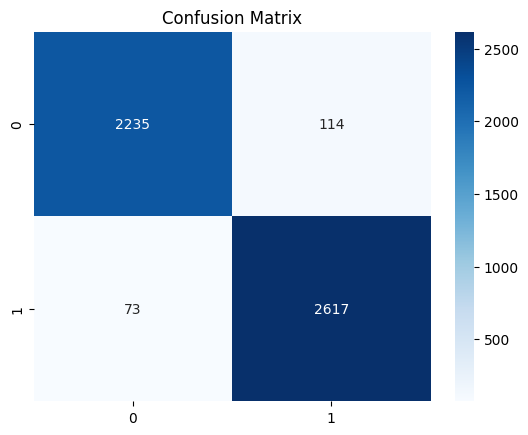

In [17]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [18]:
def predict_intrusion(protocol, service, flag, duration, src_bytes, dst_bytes, count, srv_count):

    input_data = pd.DataFrame([[protocol, service, flag,
                                duration, src_bytes, dst_bytes,
                                count, srv_count]],
                              columns=FEATURES)

    for col in ['protocol_type', 'service', 'flag']:
        input_data[col] = encoders[col].transform(input_data[col])

    input_scaled = scaler.transform(input_data)

    normal_prob, attack_prob = svm_model.predict_proba(input_scaled)[0]

    if attack_prob >= 0.8:
        status = "🚨 MALICIOUS"
    elif attack_prob >= 0.6:
        status = "⚠️ SUSPICIOUS"
    else:
        status = "✅ NORMAL"

    return {
        "status": status,
        "attack_probability_%": round(attack_prob * 100, 2),
        "normal_probability_%": round(normal_prob * 100, 2)
    }


In [19]:
predict_intrusion(
    protocol='tcp',
    service='http',
    flag='SF',
    duration=60,
    src_bytes=2000,
    dst_bytes=300,
    count=20,
    srv_count=20
)


{'status': '🚨 MALICIOUS',
 'attack_probability_%': np.float64(95.81),
 'normal_probability_%': np.float64(4.19)}

In [20]:
predict_intrusion(
    protocol='tcp',
    service='http',
    flag='SF',
    duration=9000,
    src_bytes=2800,
    dst_bytes=8000,
    count=2000,
    srv_count=20
)


{'status': '⚠️ SUSPICIOUS',
 'attack_probability_%': np.float64(76.85),
 'normal_probability_%': np.float64(23.15)}

In [21]:
predict_intrusion(
    protocol='tcp',
    service='http',
    flag='SF',
    duration=19000,
    src_bytes=4000,
    dst_bytes=800,
    count=8,
    srv_count=8
)


{'status': '✅ NORMAL',
 'attack_probability_%': np.float64(33.26),
 'normal_probability_%': np.float64(66.74)}